# Sentiment Analysis Resulting in Polarity Counts using R

#### Use the following packages

In [1]:
library(tm)
library(SnowballC)
library(plyr)
library(stringr)
library(twitteR)
library(ggplot2)

Loading required package: NLP

Attaching package: ‘twitteR’

The following object is masked from ‘package:plyr’:

    id


Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate



#### Set working Directory

In [2]:
setwd("~/Desktop/PresidentSentimentAnalysis/")

#### Load tweets and choose "text" column from .csv file

In [3]:
tweets <- read.csv("trump100days.csv")
trumpText = tweets$text

#### Load positive and negative word lists

Acquire positive word list here: http://www.unc.edu/~ncaren/haphazard/positive.txt

Acquire negative word list here: http://www.unc.edu/~ncaren/haphazard/negative.txt

The files load as .txt files. Be sure to convert them to .csv OR change the code below to handle .txt if you know how.

In [4]:
pos.words <- read.csv("positive.csv")
neg.words <- read.csv("negative.csv")

pos.words <- scan("positive.csv", what = 'character')
neg.words <- scan("negative.csv", what ='character')

#### Create Function

In [5]:
score.sentiment = function(tweets, pos.words, neg.words, .progress='none')
{
  
  scores = laply(tweets, function(trumpText, pos.words, neg.words) {
    
    # clean up tweets with R’s regex-driven global substitute, gsub():
    trumpText = gsub('[[:punct:]]', '', trumpText)
    trumpText = gsub('[[:cntrl:]]', '', trumpText)
    trumpText = gsub('\\d+', '', trumpText)
    #remove emojis
    trumpText = iconv(trumpText, "ASCII", "UTF-8", sub="")
    # and convert to lower case:
    trumpText.lower = tolower(trumpText)
    
    # split into words. str_split is in the stringr package
    word.list = str_split(trumpText.lower, '\\s+')
    # sometimes a list() is one level of hierarchy too much
    words = unlist(word.list)
    
    # compare our words to the dictionaries of positive & negative terms
    pos.matches = match(words, pos.words)
    neg.matches = match(words, neg.words)
    
    # match() returns the position of the matched term or NA
    # we just want a TRUE/FALSE:
    pos.matches = !is.na(pos.matches)
    neg.matches = !is.na(neg.matches)
    
    # and conveniently enough, TRUE/FALSE will be treated as 1/0 by sum():
    score = sum(pos.matches) - sum(neg.matches)
    
    return(score)
  }, pos.words, neg.words, .progress=.progress )
    
    # convert scores to a data frame
    scores.df = data.frame(score=scores, text=tweets)
  return(scores.df)
}
  

#### Score each tweet based on the positive and negative word dictionaries

In [6]:
trump.result <- score.sentiment(trumpText,pos.words,neg.words)

#### Convert the results of the tweets and their scores into a data frame

In [7]:
df.result <- data.frame(trump.result)

summary(trump.result$score)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-7.000000 -1.000000  0.000000  0.004026  1.000000  7.000000 

#### Create visualization of the results

$breaks
 [1] -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7

$counts
 [1]    20   115   511  2569 10599 34205 84232 36410 10074  2433   464   160
[13]     8     3

$density
 [1] 1.100092e-04 6.325528e-04 2.810735e-03 1.413068e-02 5.829937e-02
 [6] 1.881432e-01 4.633147e-01 2.002717e-01 5.541163e-02 1.338262e-02
[11] 2.552213e-03 8.800735e-04 4.400367e-05 1.650138e-05

$mids
 [1] -6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5

$xname
[1] "df.result$score"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


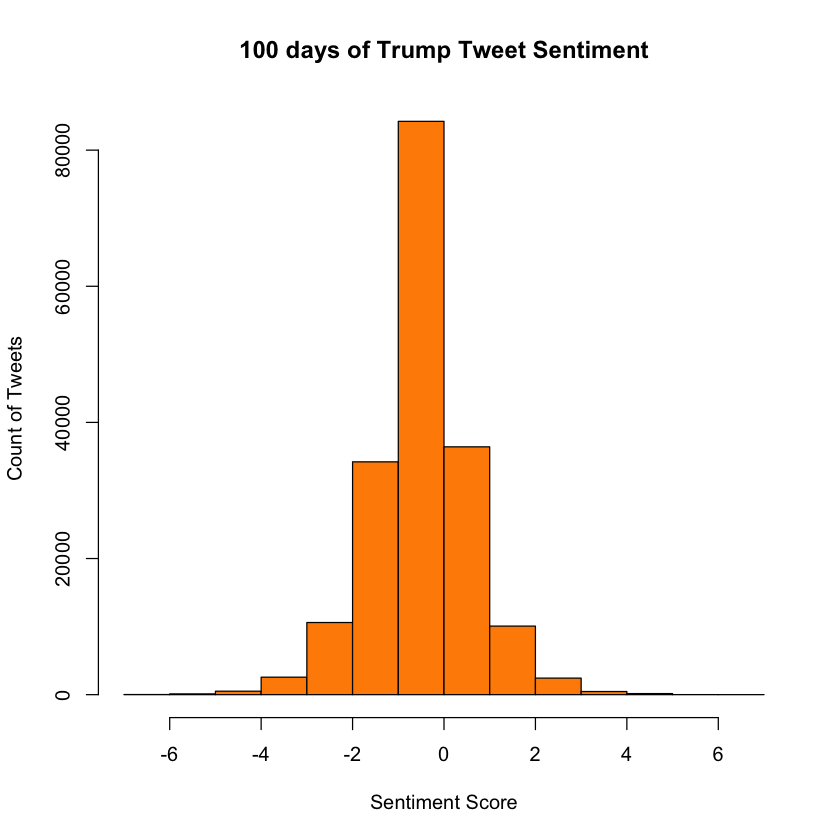

In [8]:
p <-  hist(df.result$score, col ="darkorange", main = "100 days of Trump Tweet Sentiment", ylab = "Count of Tweets", xlab = "Sentiment Score")



print(p)